### Machine Learning Supervised Project
#### Universidad de Navarrra, noviembre de 2022
#### Diego Rafael de Lemos Burgaña

Primero, cargamos todas las librerias que vamos a utilizar en el trabajo

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import csv
from sklearn.model_selection import train_test_split as tts

Importamos los datos descargados de internet. <br>
En este caso vamos a trabajar con datos sobre salarios en distintos trabajos como un data engineer, data analyst, data scientist, etc <br>
<br>
El objetivo es realizar un modelo de regresion que utilice como variable "target" la de salario estimado segun las caracteristicas del trabajo y de la persona.


In [2]:
df = pd.read_csv(r'C:\Users\diede\OneDrive\Desktop\Machine Learning Project\data.csv', encoding='cp1252', index_col=None)
print(df)

                     Job Title  Rating            Company Name  \
0               Data Scientist     3.8     Tecolote Research\n   
1               Data Scientist     4.8                  KnowBe   
2               Data Scientist     3.8                  PNNL\n   
3               Data Scientist     2.9    Affinity Solutions\n   
4               Data Scientist     3.4              CyrusOne\n   
..                         ...     ...                     ...   
200              Data Engineer     4.0    Pinnacol Assurance\n   
201              Data Engineer     3.4     MetroStar Systems\n   
202  Machine Learning Engineer     3.2  Information Builders\n   
203             Data Scientist     3.2          Numeric, LLC\n   
204              Data Engineer     3.9             Fivestars\n   

          Headquarters          Size  Founded       Type of ownership  \
0           Goleta, CA   501 - 1000      1973       Company - Private   
1       Clearwater, FL   501 - 1000      2010       Company -

Eliminamos variables categoricas que no consideremos importantes para el modelo de regresion lineal al igual que aquellas que generan multicolinearidad en el modelo.

In [3]:
df.drop(df.columns[[2, 3, 4, 6,7,8, 9, 10,11,12,14,15,33]], axis=1, inplace=True)

In [4]:
df.dtypes
df.isna().sum()

Job Title        0
Rating           0
Founded          0
Avg Salary(K)    0
Age              0
Python           0
spark            0
aws              0
excel            0
sql              0
sas              0
keras            0
pytorch          0
scikit           0
tensor           0
hadoop           0
tableau          0
bi               0
flink            0
mongo            0
google_an        0
Degree           0
dtype: int64

Contamos los distintos valores que hay dentro de la variable 'Job Title' para luego codificarla y poder trabajar con ella

In [5]:
df['Job Title'].value_counts()

Data Scientist               131
Data Engineer                 53
Data Analyst                  15
Machine Learning Engineer      5
Data Modeler                   1
Name: Job Title, dtype: int64

Luego reemplazamos los valores de esa categoria por numeros para tenerla de una manera mas trabajable para el modelo

In [6]:
df.loc[ df['Job Title'] == 'Data Analyst', 'Job Title'] = 1
df.loc[ df['Job Title'] == 'Data Scientist', 'Job Title'] = 2
df.loc[ df['Job Title'] == 'Data Engineer', 'Job Title'] = 3
df.loc[ df['Job Title'] == 'Machine Learning Engineer', 'Job Title'] = 0
df.loc[ df['Job Title'] == 'Data Modeler', 'Job Title'] = 0

df['Job Title'].value_counts()

2    131
3     53
1     15
0      6
Name: Job Title, dtype: int64

In [7]:
df.loc[ df['Degree'] == 'na', 'Degree'] = 0
df['Degree'].value_counts()
df['Degree'] = df['Degree'].astype(int)

In [8]:
# Dividimos en target y Data
target = 'Avg Salary(K)'
x = df.drop('Avg Salary(K)', axis = 1)
y = df[target]

print(x)

    Job Title  Rating  Founded  Age  Python  spark  aws  excel  sql  sas  ...  \
0           2     3.8     1973   48       1      0    0      1    0    1  ...   
1           2     4.8     2010   11       1      1    0      1    1    1  ...   
2           2     3.8     1965   56       1      0    0      0    0    0  ...   
3           2     2.9     1998   23       1      0    0      1    1    1  ...   
4           2     3.4     2000   21       1      0    1      1    1    0  ...   
..        ...     ...      ...  ...     ...    ...  ...    ...  ...  ...  ...   
200         3     4.0     1915  106       1      0    1      0    1    0  ...   
201         3     3.4     1999   22       0      0    1      0    0    0  ...   
202         0     3.2     1975   46       1      0    1      1    1    0  ...   
203         2     3.2       -1   -1       1      1    1      0    1    0  ...   
204         3     3.9     2011   10       1      0    1      1    1    0  ...   

     pytorch  scikit  tenso

In [9]:
# Dividimos en train y en test
xtr, xte, ytr, yte = tts(x, y, test_size=0.25, random_state=123)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector as select
from sklearn.linear_model import LinearRegression

In [10]:
#Transformaciones a los datos, sean numericos o categoricos
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first'))])


ct = ColumnTransformer(transformers=[
    ('num', num_trans, select(dtype_exclude="object")),
    ('cat', cat_trans, select(dtype_include="object"))
])

In [11]:
# Elegimos el modelo de regresion lineal
lr = Pipeline(steps=[('pre', ct),
                     ('LR', LinearRegression())])

lr.fit(xtr,ytr)

# Predecimos con el modelo que hemos hecho
y_lr = lr.predict(xte)
print(y_lr)


[ 55.22830268  94.9366959   83.67436616  69.85802252  80.59807332
  86.8445268   83.50870841 112.76169906  96.1038678  106.07672191
 103.94664648  94.5795301   88.01456754  99.10702052 103.83862781
  88.33441916 117.75548251  80.59807332  95.91898727 124.52175656
 103.36691925 118.14767445 111.94476454 101.38911833 106.07672191
  80.51774637 110.97518351 101.38911833 104.53234345  95.28305945
  82.64174763  97.25146684 101.49273982 110.46892833  69.77374173
 102.32263225  64.71488622  91.8342581  116.16535458 101.18069215
  94.75475217  89.59277128 124.52175656 110.53031085  99.7436744
  86.8445268   77.64819631 109.05745953 107.58341852  97.33671366
  89.94907406  88.33441916]


In [12]:
from sklearn import metrics
def resultado(yt, yp): 
    print('R^2:', round(metrics.r2_score(yt, yp) ,4))
    print('MAE:', round(metrics.mean_absolute_error(yt, yp) ,4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(yt, yp)),4))

resultado(yte,y_lr)

R^2: 0.1623
MAE: 14.7373
RMSE: 18.5257


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = Pipeline(steps=[('pre', ct),
                      ('GBM', GradientBoostingRegressor())])


gbm.fit(xtr,ytr)
y_gbm = gbm.predict(xte)
resultado(yte,y_gbm)

R^2: 0.2001
MAE: 14.0383
RMSE: 18.1025


Cross-Validation

Con r2 primero y despues con linear regression

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbm, xtr, ytr, cv=10, scoring = 'r2')
print(scores)

[ 0.62883165  0.12004908  0.53412841  0.73769053 -0.09165511  0.04496367
  0.5306755   0.24209169 -0.18373258  0.2199039 ]


In [15]:
scores = cross_val_score(lr, xtr, ytr, cv=10, scoring = 'r2')
print(scores)

[ 0.43217841  0.32722376  0.32822481 -0.03475361  0.04518168 -0.97504244
  0.35638281 -0.13739982 -0.82815293  0.04812109]


In [17]:
from sklearn.model_selection import RepeatedKFold
rcv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=123)

scores = cross_val_score(gbm, xtr, ytr, cv=rcv, scoring = 'r2')
print(scores)

[ 0.28223894  0.42101569  0.50614867  0.43296428 -0.04114387  0.40155945
  0.75323184  0.10059709  0.50834163  0.17786198  0.36594465  0.23400063
  0.2960881   0.00253514  0.45625779  0.27874092  0.32104414  0.27000091
 -0.29438748 -0.29594722  0.32901     0.3573629   0.6762084   0.31526498]


Tuning

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = Pipeline(steps=[('p', ct),
                     ('RF', RandomForestRegressor())])

grid = {
'RF__n_estimators' : [150, 200, 250],
'RF__max_depth'    : [6, 7, 8],
'RF__max_features' : ["sqrt", "log2"]
}

In [28]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf, grid, cv = 3, scoring = 'r2')
gs.fit(xtr, ytr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('p',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019442CAFE80>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000194460F7A00>)])),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__max_depth': [6, 7, 8],
                         'RF__max_features': ['sqrt', 'log2'],
                         'RF__n_estimators': [150, 200, 250]},
             scoring='r2')

In [29]:
y_gs = gs.predict(xte)
y_gsN = gs.best_estimator_.predict(xte)
print(y_gsN)

[ 83.10907758  98.05739839  90.48014011  67.09381397  88.78069974
  97.39260805  91.74475862 106.03915577  96.75219244 101.54307862
  97.34266195  97.10525449  91.47194098 103.07079337 108.05580589
  90.89404725 121.08456481  88.78069974  98.23586126 104.7609448
  96.56825727 111.69089514 108.80420238  93.67821324 101.54307862
  88.17281005 118.74661123  93.67821324  89.00290579  95.24647453
 114.15909236  89.23973257 100.36971663  91.90887018  92.2819068
  88.14658109  78.53752103  80.05919899 108.03266934  96.922609
 105.23375417  97.7646876  104.7609448  100.23014181  99.12556859
  97.39260805  86.76803128  94.9369877  102.2933316  111.6826188
  97.09778381  90.89404725]


In [30]:
resultado(yte,y_gs)
resultado(yte,y_gsN)

R^2: 0.3388
MAE: 13.44
RMSE: 16.4581
R^2: 0.3388
MAE: 13.44
RMSE: 16.4581


Aca se puede ver realidad y la prediccion de los datos

In [31]:
df = pd.DataFrame({'real': yte.astype(int), 'predicción': y_gs.astype(int)})
df.head(20)

,real,predicción
88,69,83
72,81,98
114,92,90
158,66,67
163,80,88
159,94,97
185,114,91
93,96,106
91,84,96
19,96,101


Nested Cross-Validation

Calculamos la media y la varianza del estimador con los mejores parametros

In [32]:
sco_tr = cross_val_score(gs.best_estimator_, xtr, ytr, scoring='r2', cv=20)
sco_te = cross_val_score(gs.best_estimator_, xte, yte, scoring='r2', cv=20)

print('R^2 para train: %.3f (%.3f)' % (np.mean(sco_tr), np.std(sco_tr)))
print('R^2 para test: %.3f (%.3f)' % (np.mean(sco_te), np.std(sco_te)))

R^2 para train: 0.206 (0.438)
R^2 para test: -41.059 (121.552)


Benchmarking

Creamos los modelos

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

modelos = []
modelos.append(('LR', lr))
modelos.append(('GBM', gbm))
modelos.append(('RF', gs.best_estimator_))

resultados = []
nombres = []


In [34]:
for nombre, modelo in modelos:
    kfold = KFold(n_splits=25)
    cv = -cross_val_score(modelo, xtr, ytr, cv=kfold, scoring='neg_mean_absolute_error')
    resultados.append(cv)
    nombres.append(nombre)
    msg = "%s: %f (%f)" % (nombre, cv.mean(), cv.std())
    print(msg)

LR: 18.714290 (4.817246)
GBM: 14.204864 (4.439237)
RF: 14.147680 (4.209922)


Representacion grafica de los algoritmos

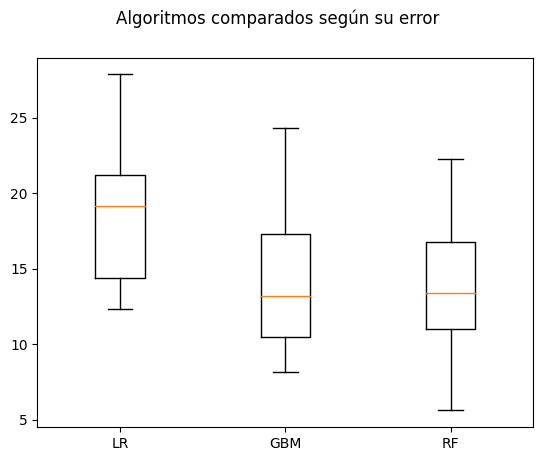

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Algoritmos comparados según su error')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()